In [86]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from functools import partial

In [114]:
class Box:
    def __init__(self, x, m, velocity=0):
        self.x = x
        self.m = m
        self.v = velocity
        self.s = 10

    def update_position(self, t):
        self.x += self.v * t

    def check_wall_collision(self, collisions):
        if self.x <= 0:
            self.x = 0
            self.v = -self.v
            collisions += 1


def collision(m1, m2, v1, v2):
    v1f = (2 * m2 * v2 + (m1 - m2) * v1) / (m1 + m2)
    v2f = (2 * m1 * v1 + (m2 - m1) * v2) / (m1 + m2)

    return v1f, v2f


def update(frame, b1, b2, rect1, rect2):
    global collisions

    t = frame * 0.01
    b1.update_position(t)
    b2.update_position(t)

    if np.abs(b1.x - b2.x) <= (b1.s + b2.s) / 2:
        b1.v, b2.v = collision(b1.m, b2.m, b1.v, b2.v)
        collisions += 1

    b1.check_wall_collision(collisions)
    b2.check_wall_collision(collisions)

    rect1.set_x(b1.x)
    rect2.set_x(b2.x)

    print(b1.x, b2.x, frame)
    frame += 1



    return rect1, rect2

5.0 60.0 0
5.0 60.0 0


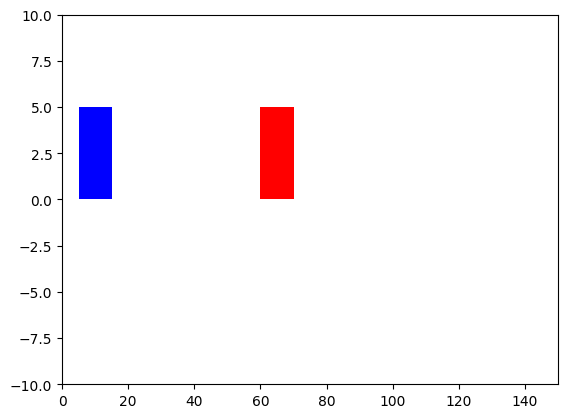

In [115]:
b1 = Box(5, 10)
b2 = Box(60, 10, velocity=-10)

dt = 0.01
t = 0
collisions = 0

fig, ax = plt.subplots()
ax.set_xlim(0, 150)
ax.set_ylim(-10, 10)

# Dibujar las cajas como rectángulos
rect1 = plt.Rectangle((b1.x, 0), b1.s, 5, fc="blue")
rect2 = plt.Rectangle((b2.x, 0), b2.s, 5, fc="red")

ax.add_patch(rect1)
ax.add_patch(rect2)

# Crear animación
ani = animation.FuncAnimation(
    fig,
    update,
    frames=300,
    interval=50,
    blit=True,
    fargs=(b1, b2 ,rect1, rect2),  # argumentos extra para 'update'
)

plt.show()